# **PARTE** **1**

##*Carga y Transformación de la Base de Datos*



In [23]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# Carga el archivo CSV con los datos de estudiantes
df = pd.read_csv("student_habits_performance.csv")

# Transformación de las variables categóricas a valores numéricos
df['gender'] = df['gender'].replace({'Male': 0, 'Female':1, 'Other':2})
df['extracurricular_participation'] = df ['extracurricular_participation'].replace({'No':0, 'Yes':1})
df['diet_quality']=df['diet_quality'].replace({'Poor': 0, 'Fair':1, 'Good':2})
df['internet_quality']=df['internet_quality'].replace({'Poor': 0, 'Average':1, 'Good':2})
df['part_time_job'] = df['part_time_job'].replace({'No':0, 'Yes':1})

#Eliminacion de columna que no nos interesa para la red.
df = df.drop("parental_education_level",axis=1)

# Reemplaza la primera columna ('student_id') por el índice
df.iloc[:,0]=df.index

# Función para transformar una nota numérica en aprobado (1) o desaprobado (0)
def calificar(nota):
    if nota > 70:
        return 1
    else:
        return 0

#Transformación de la columna output a aprobado y desaprobado,para obtener una variable binaria.
df['score']= df["exam_score"].apply(calificar)

# Convierte todo el DataFrame a tipo float para facilitar el procesamiento posterior
df = df.astype(float)

#df normalizado convertido a csv
df.to_csv("student_habits_performanceNormalizado.csv",index=False)
dfModif = pd.read_csv("student_habits_performanceNormalizado.csv")

#df normalizado
for column in df:
    dfModif[column] = (dfModif[column]) / (dfModif[column].max())

<ipython-input-24-ec26a7e6b590>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female':1, 'Other':2})
<ipython-input-24-ec26a7e6b590>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['extracurricular_participation'] = df ['extracurricular_participation'].replace({'No':0, 'Yes':1})
<ipython-input-24-ec26a7e6b590>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obj

## *Matriz de Correlación*

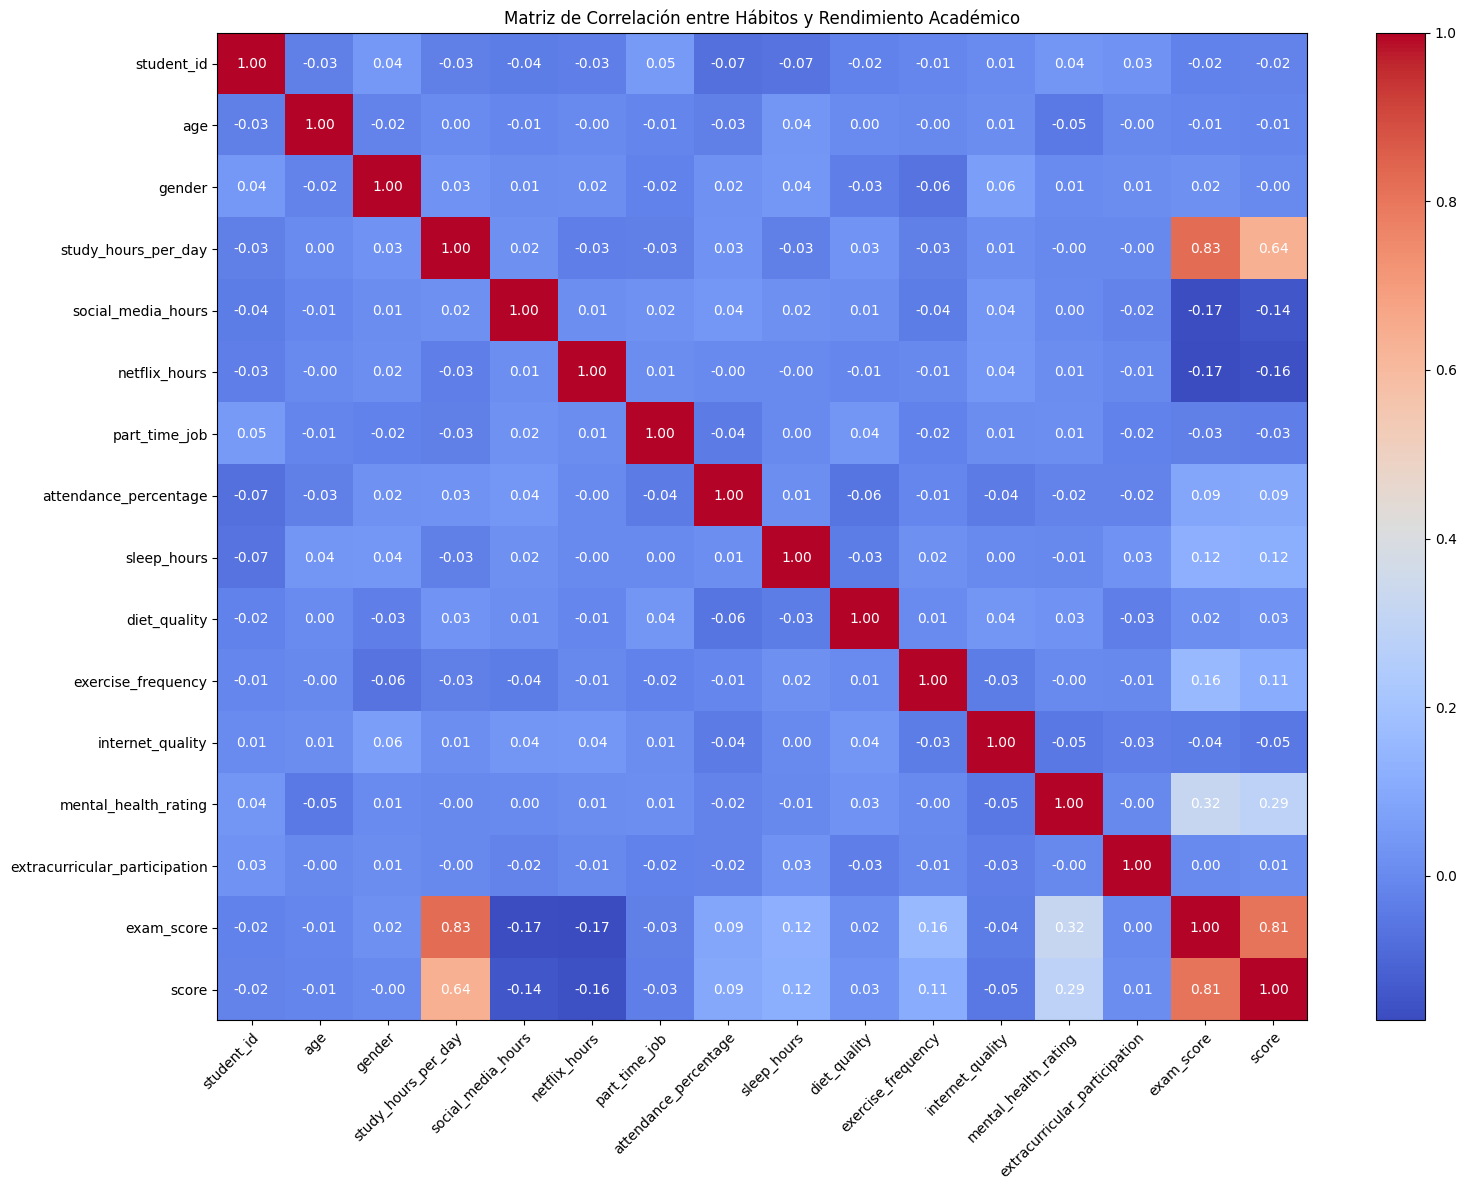

In [25]:
#Calcula la matriz de correlación
corr_matriz = df.corr(numeric_only=True)

#Crea el heatmap con Matplotlib
fig, ax = plt.subplots(figsize=(16, 12))  # Crea figura y ejes

#Visualizo la matriz como una imagen
im = ax.imshow(corr_matriz, cmap='coolwarm', aspect='auto')  # 'aspect' para evitar distorsión de la imagen

#Añado etiquetas de los ejes con los nombres de las columnas
ax.set_xticks(np.arange(len(corr_matriz.columns)))
ax.set_yticks(np.arange(len(corr_matriz.columns)))
ax.set_xticklabels(corr_matriz.columns)
ax.set_yticklabels(corr_matriz.columns)

#Rota etiquetas del eje X para que no se solapen
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#Añade valores de correlación como texto
for i in range(len(corr_matriz.columns)):
    for j in range(len(corr_matriz.columns)):
        text = ax.text(j, i, format(corr_matriz.iloc[i, j], ".2f"),  # Formatea a 2 decimales
                       ha="center", va="center", color="w")  # Centrar texto, color blanco

#Añade título y barra de color
ax.set_title("Matriz de Correlación entre Hábitos y Rendimiento Académico")
fig.colorbar(im, ax=ax)   # Muestra escala de colores a la derecha

# Ajustar todo el diseño para que no se corten etiquetas
plt.tight_layout()

# Mostrar el gráfico en pantalla
plt.show()

##*Limpieza de columnas según nuestra matriz de correlaciones*

In [38]:
dfModif = dfModif.drop("diet_quality", axis=1)
dfModif = dfModif.drop("extracurricular_participation", axis=1)
dfModif = dfModif.drop("internet_quality", axis=1)
dfModif = dfModif.drop("exam_score", axis=1)
dfModif = dfModif.drop("student_id", axis=1)

##*Nuevo heatmap modificado*

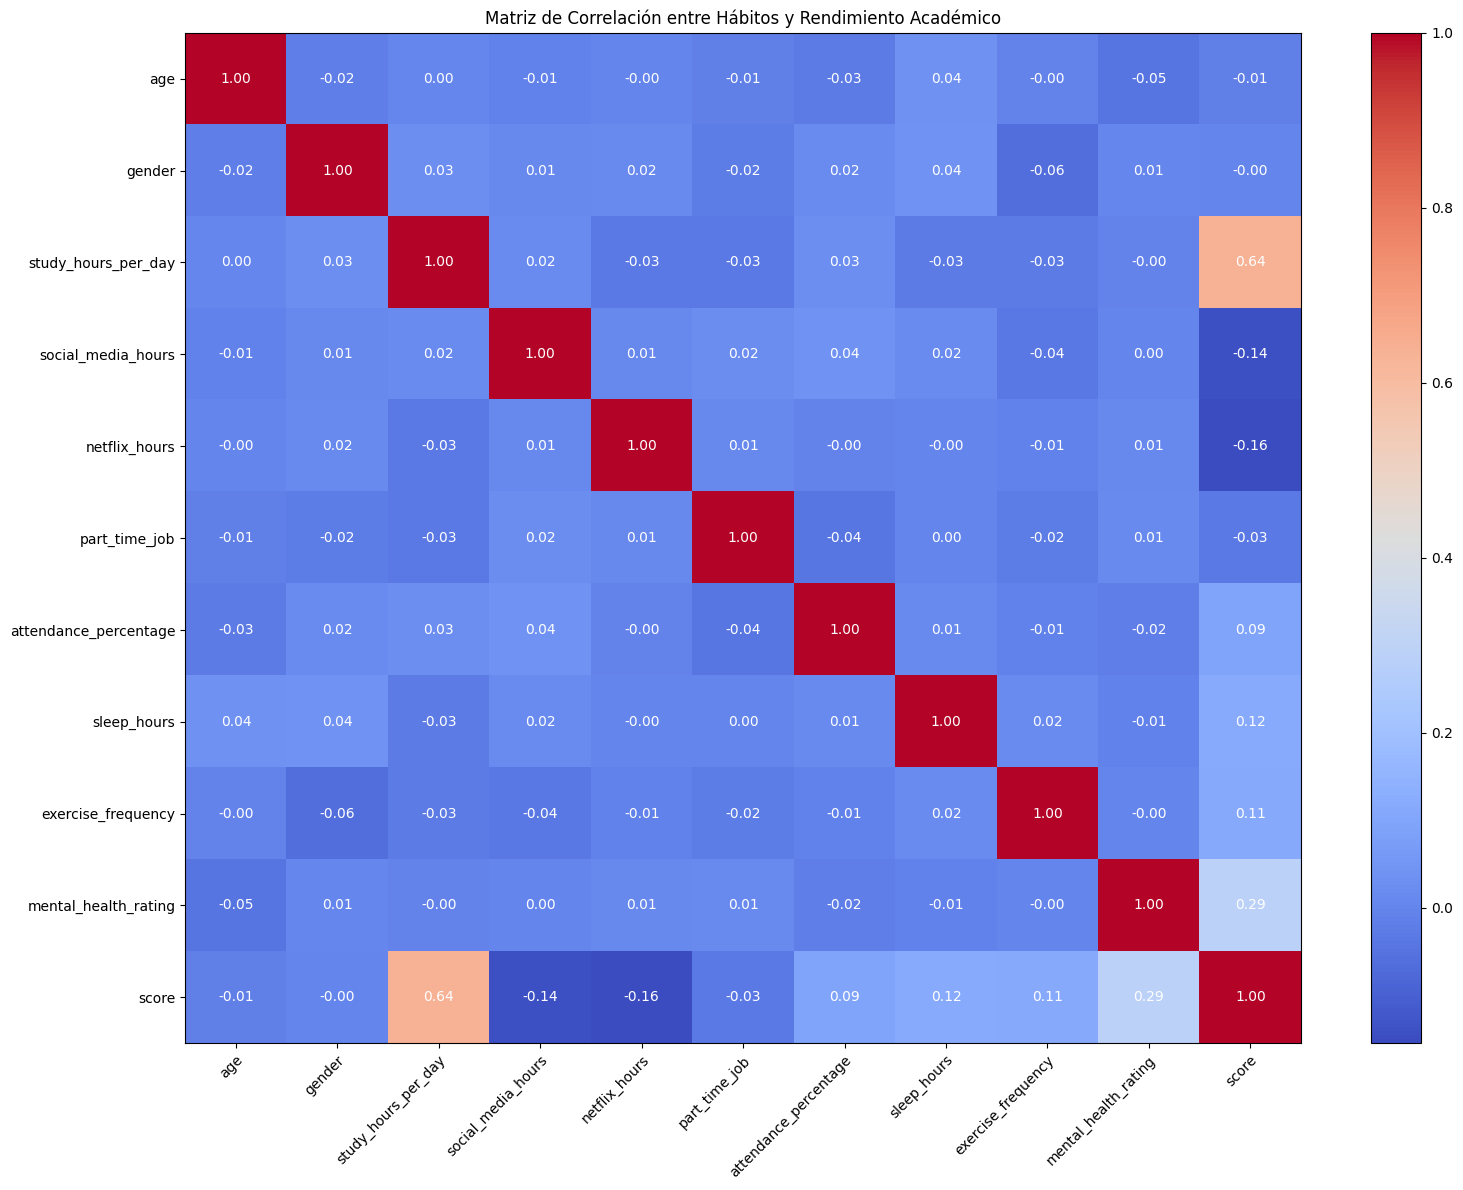

In [39]:
#Calcula la matriz de correlación
corr_matriz = dfModif.corr(numeric_only=True)

#Crea el heatmap con Matplotlib
fig, ax = plt.subplots(figsize=(16, 12))  # Crea figura y ejes

#Visualizo la matriz como una imagen
im = ax.imshow(corr_matriz, cmap='coolwarm', aspect='auto')  # 'aspect' para evitar distorsión de la imagen

#Añado etiquetas de los ejes con los nombres de las columnas
ax.set_xticks(np.arange(len(corr_matriz.columns)))
ax.set_yticks(np.arange(len(corr_matriz.columns)))
ax.set_xticklabels(corr_matriz.columns)
ax.set_yticklabels(corr_matriz.columns)

#Rota etiquetas del eje X para que no se solapen
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#Añade valores de correlación como texto
for i in range(len(corr_matriz.columns)):
    for j in range(len(corr_matriz.columns)):
        text = ax.text(j, i, format(corr_matriz.iloc[i, j], ".2f"),  # Formatea a 2 decimales
                       ha="center", va="center", color="w")  # Centrar texto, color blanco

#Añade título y barra de color
ax.set_title("Matriz de Correlación entre Hábitos y Rendimiento Académico")
fig.colorbar(im, ax=ax)   # Muestra escala de colores a la derecha

# Ajustar todo el diseño para que no se corten etiquetas
plt.tight_layout()

# Mostrar el gráfico en pantalla
plt.show()

##*Análisis de histogramas y estadísticas descriptivas del DF*


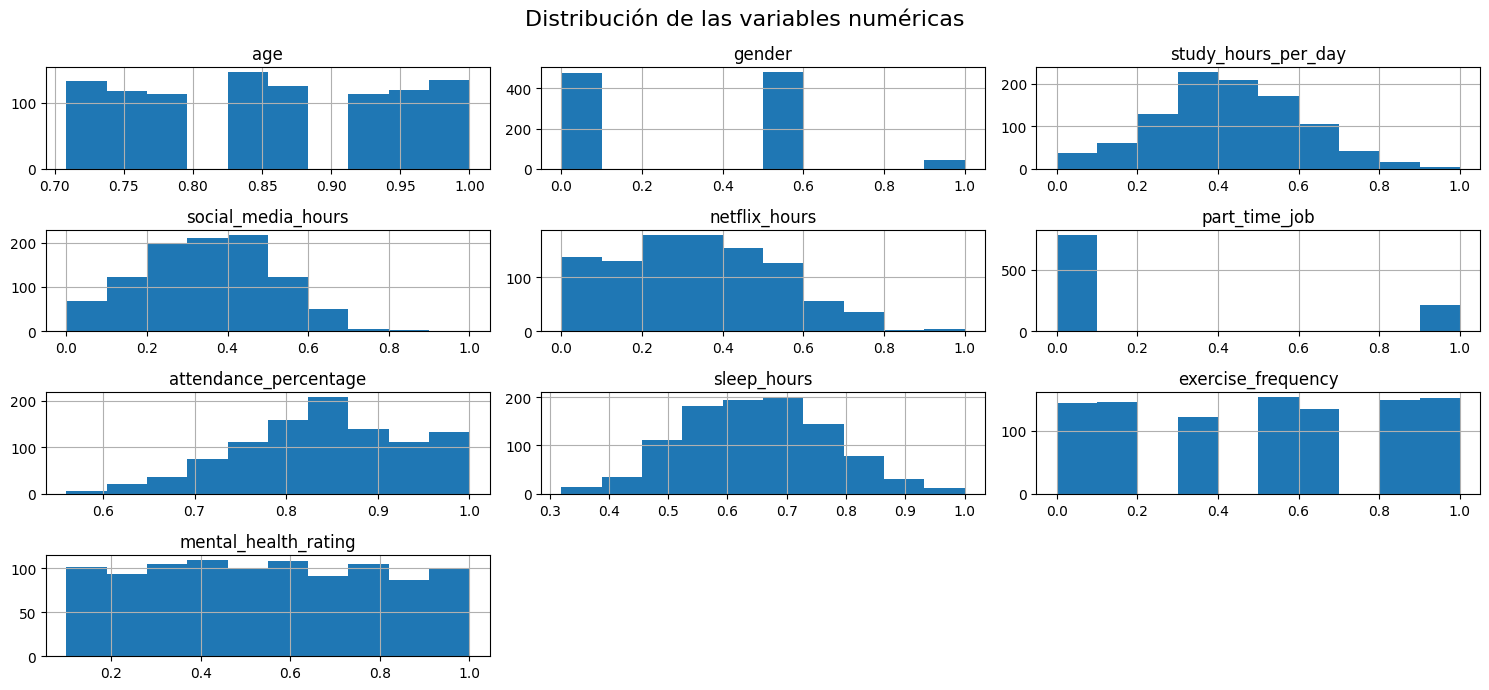

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
age,1000.0,0.854083,0.096171,0.708333,0.781250,0.833333,0.958333,1.0
gender,1000.0,0.282500,0.287274,0.000000,0.000000,0.500000,0.500000,1.0
study_hours_per_day,1000.0,0.427723,0.176975,0.000000,0.313253,0.421687,0.542169,1.0
social_media_hours,1000.0,0.347986,0.162836,0.000000,0.236111,0.347222,0.458333,1.0
netflix_hours,1000.0,0.336981,0.199096,0.000000,0.185185,0.333333,0.467593,1.0
part_time_job,1000.0,0.215000,0.411028,0.000000,0.000000,0.000000,0.000000,1.0
attendance_percentage,1000.0,0.841317,0.093992,0.560000,0.780000,0.844000,0.910250,1.0
sleep_hours,1000.0,0.647010,0.122638,0.320000,0.560000,0.650000,0.730000,1.0
exercise_frequency,1000.0,0.507000,0.337571,0.000000,0.166667,0.500000,0.833333,1.0
mental_health_rating,1000.0,0.543800,0.284750,0.100000,0.300000,0.500000,0.800000,1.0


In [40]:
# Crear un DataFrame con solo las columnas numéricas (sin la columna 'score')
numeric_df = dfModif.drop(columns=['score'])

numeric_df.hist(bins=10, figsize=(15, 7)) # Histograma de cada columna para ver su como es su distribución
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

#Estadísticas descriptivas del DF
df_stats=dfModif.describe().T #Estadísticas transpuestas para facilitar la normalización
print("Estadísticas descriptivas:")
df_stats

##*Gráfico de Media y Mediana*

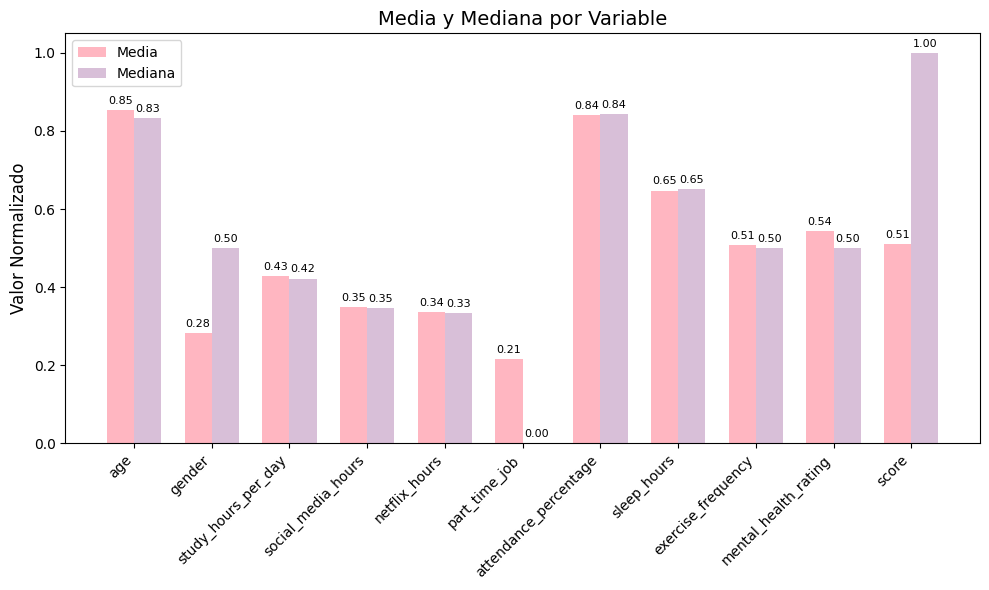

In [41]:
# Gráfico de media y mediana
media = dfModif.mean(numeric_only=True)
mediana = dfModif.median(numeric_only=True)

etiqueta = media.index

x = np.arange(len(etiqueta))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, media, width, label='Media', color='#FFB6C1') # Rosa claro
rects2 = ax.bar(x + width/2, mediana, width, label='Mediana', color='#D8BFD8') # Violeta claro

ax.set_ylabel('Valor Normalizado', fontsize=12)
ax.set_title('Media y Mediana por Variable', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(etiqueta, rotation=45, ha="right", fontsize=10)
ax.legend()

# Función para añadir etiquetas de valor en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


# **PARTE 2**

Preparación y división de datos

In [42]:
#Separa los datos en variables de entrada y salida

allInputs= (dfModif.iloc[:, 0: -1])  # Todas las columnas excepto la última como entradas
allOutputs= (dfModif.iloc[:, -1])     # Última columna como salida

# Dividir datos en conjunto de entrenamiento y testeo.
#1/3 para test y 2/3 para entrenamiento.
xEntrenamiento, xTest, yEntrenamiento, yTest = train_test_split(allInputs, allOutputs,
    test_size=1/3)

# n = cantidad de ejemplos en el set de entrenamiento
n = xEntrenamiento.shape[0]

#Convierto en arrays de NumPy para evitar que los tome como DataFrames
xEntrenamiento = np.array(xEntrenamiento)
yEntrenamiento = np.array(yEntrenamiento)
xTestt = np.array(xTest)
yTest = np.array(yTest)


##*Gráficos para encontrar el mejor L*

In [43]:
from tqdm.auto import tqdm  # Importa tqdm para mostrar barras de progreso en loops

accuracy_train_l = []  # Lista para almacenar los valores de accuracy en entrenamiento por iteración
accuracy_test_l = []   # Lista para almacenar los valores de accuracy en test por iteración

def graficar_accuracy(L, train_l, test_l):
    iteraciones = len(test_l)  # Número total de iteraciones (asumido igual para test y train)

    # Configuración del formato de la línea para accuracy en entrenamiento
    fmt_train = {
        'color': 'violet',  # Color violeta para la línea de entrenamiento
        'ls': 'solid',      # Línea sólida
        'lw': 3             # Ancho de línea 3
    }

    # Configuración del formato de la línea para accuracy en test
    fmt_test = {
        'color': 'green',   # Color verde para la línea de test
        'ls': 'solid',      # Línea sólida
        'lw': 3             # Ancho de línea 3
    }

    # Crear la figura y el eje para graficar, tamaño 10x6 pulgadas
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar accuracy de entrenamiento
    ax.plot(train_l, label='Train Accuracy', **fmt_train)

    # Graficar accuracy de test
    ax.plot(test_l, label='Test Accuracy', **fmt_test)

    # Título del gráfico con el valor de L (learning rate)
    ax.set_title(f'Precisión por Iteración (L = {L})', fontsize=16)

    # Etiqueta del eje X (iteraciones)
    ax.set_xlabel('Iteración', fontsize=13)

    # Etiqueta del eje Y (accuracy)
    ax.set_ylabel('Accuracy', fontsize=13)

    # Mostrar la leyenda con tamaño de fuente 12
    ax.legend(fontsize=12)

    # Mostrar la cuadrícula para mejor visualización
    ax.grid(True)

    # Ajustar layout para evitar cortes en etiquetas y título
    fig.tight_layout()

    # Mostrar el gráfico en pantalla
    plt.show()

##*Creación de nuestra red neuronal*
*Funciones Forward y Backward Propagation*

In [44]:
def mi_red_neuronal(L,iteraciones):
    np.random.seed(10) #Con una semilla para reproductibilidad
    hidden_size = 6
    w_hidden = np.random.rand(hidden_size, 10)*0.2 # hay 6 nodos en la  capa oculta y 10 entradas, cada una con su peso
    w_output = np.random.rand(1, hidden_size)*0.2 # Hay 1 nodo de salida y 6 entradas de cada uno de los nodos de la capa anterior
    b_hidden = np.random.rand(hidden_size, 1)*0.2 # Al haber 6 nodos, cada uno tiene su propio sesgo
    b_output = np.random.rand(1, 1)*0.2 # El nodo de salida tiene su propio sesgo

    # Funciones de activacion
    relu = lambda x: np.maximum(x, 0) #Para la capa oculta
    logistic = lambda x: 1 / (1 + np.exp(-x)) #Para la capa de salida


    def forward_prop(X): # Forward propagation con una capa oculta y una capa de salida
        Z1 = w_hidden @ X + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2

    #Back propagation

    # Derivadas de las funciones de activación
    d_relu = lambda x: x > 0
    d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

    # Cálculo de derivadas para obtener la derivada del costo con respecto a cada elemento
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        # Cálculo de cada parte de la derivada utilizando la regla de la cadena
        dC_dA2 = 2 * A2 - 2 * Y
        dA2_dZ2 = d_logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        # Derivadas del costo con respecto a W2, B2, A1, W1 y B1
        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    # Descenso de gradiente estocástico
    accuracy_train_l = []
    accuracy_test_l = []

    for i in tqdm(range(iteraciones)):
        # seleccionar aleatoriamente uno de los datos de entrenamiento
        idx = np.random.choice(n, 1, replace=False)
        X_sample = xEntrenamiento[idx].transpose()
        Y_sample = yEntrenamiento[idx]

        # pasar datos seleccionados aleatoriamente a través de la red neuronal
        Z1, A1, Z2, A2 = forward_prop(X_sample)

        # distribuir error a través de la retropropagación
        # y devolver pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        # actualizar pesos y sesgos
        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2

        # Calculo de presisión train
        train_predictions = forward_prop(xEntrenamiento.transpose())[3]
        train_predictions = np.array(train_predictions)  # o train_predictions.to_numpy() si es pandas
        train_comparisons = np.equal((train_predictions >= 0.5).flatten().astype(int), yEntrenamiento)
        train_accuracy = np.mean(train_comparisons)
        accuracy_train_l.append(train_accuracy)

        # Calculo de precisión de prueba (usar datos test y pasar traspuesto)
        test_predictions = forward_prop(xTest.transpose())[3]
        test_predictions = np.array(test_predictions)  # o test_predictions.to_numpy() si es pandas
        test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), yTest)
        test_accuracy = np.mean(test_comparisons)
        accuracy_test_l.append(test_accuracy)

    graficar_accuracy(L=L, train_l=accuracy_train_l,test_l=accuracy_test_l)

##*Evaluación de rendimiento mediante diferentes L e Iteraciones*

  0%|          | 0/1000 [00:00<?, ?it/s]

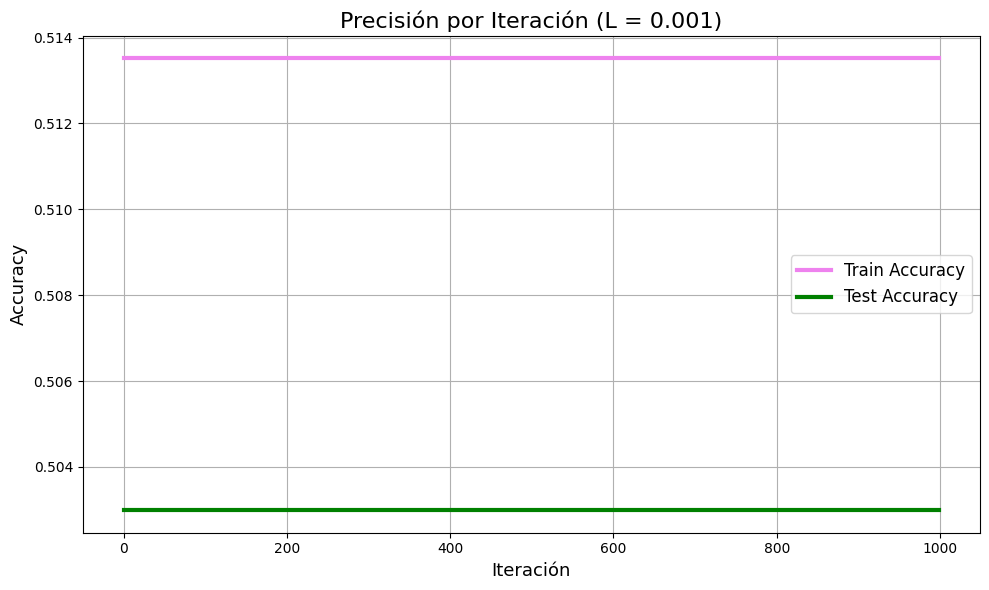

  0%|          | 0/1000 [00:00<?, ?it/s]

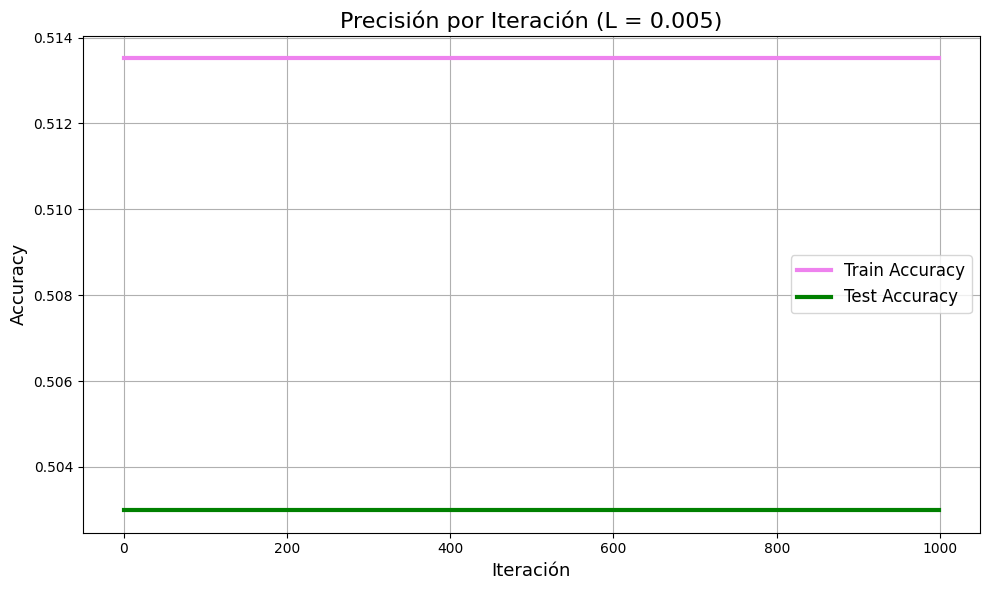

  0%|          | 0/1000 [00:00<?, ?it/s]

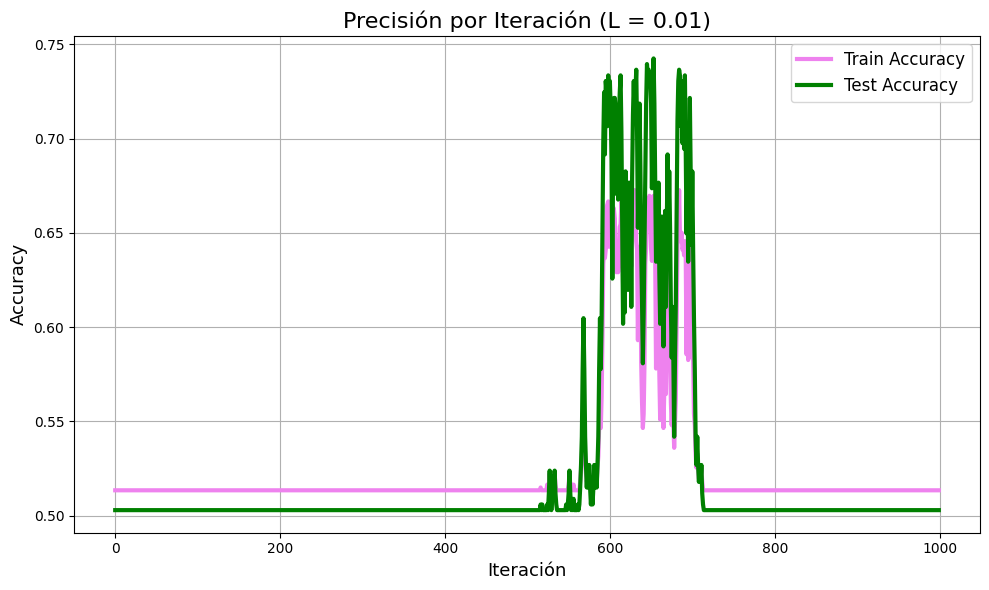

  0%|          | 0/1000 [00:00<?, ?it/s]

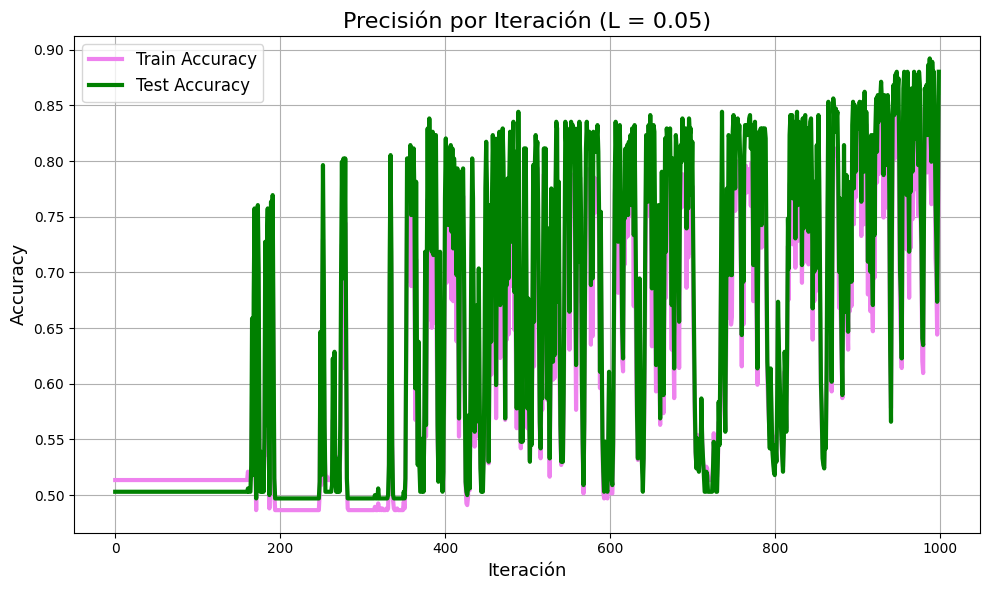

  0%|          | 0/1000 [00:00<?, ?it/s]

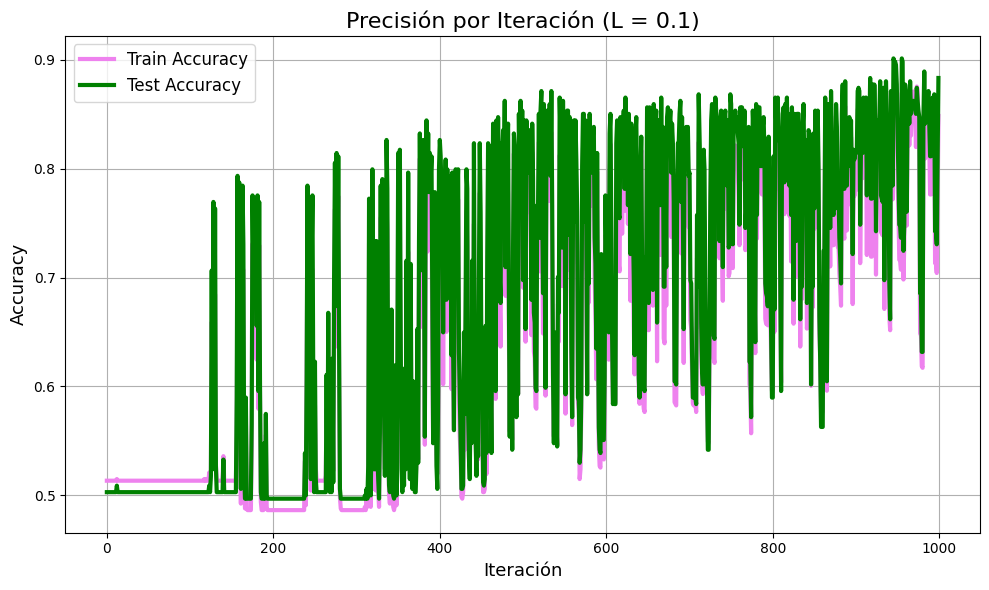

  0%|          | 0/10000 [00:00<?, ?it/s]

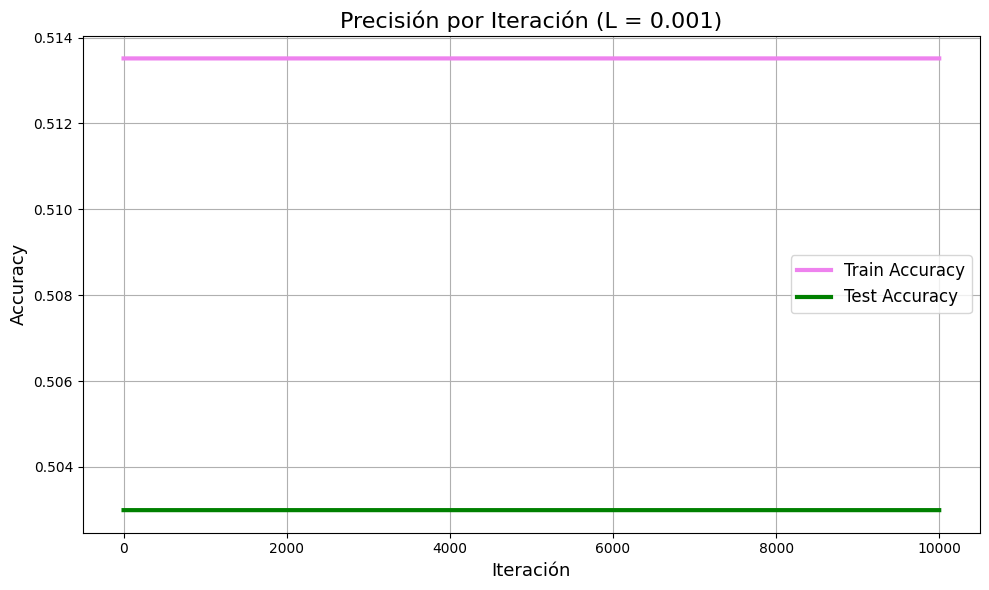

  0%|          | 0/10000 [00:00<?, ?it/s]

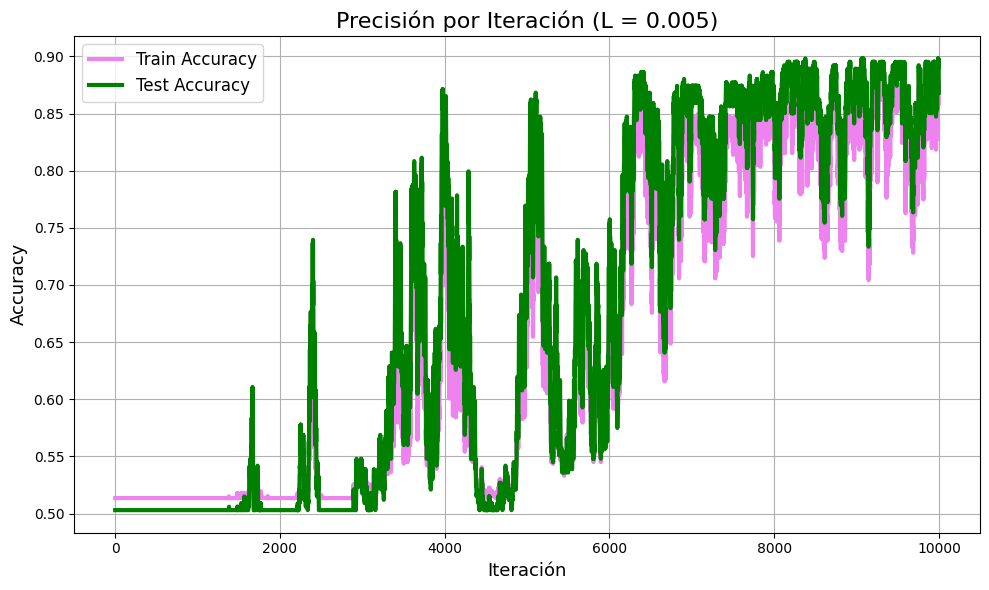

  0%|          | 0/10000 [00:00<?, ?it/s]

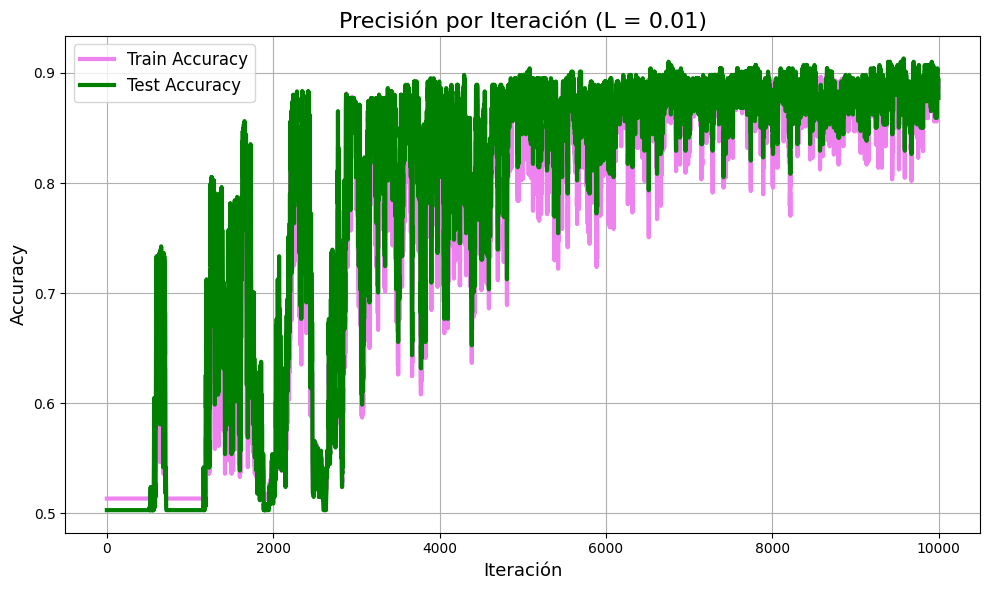

  0%|          | 0/10000 [00:00<?, ?it/s]

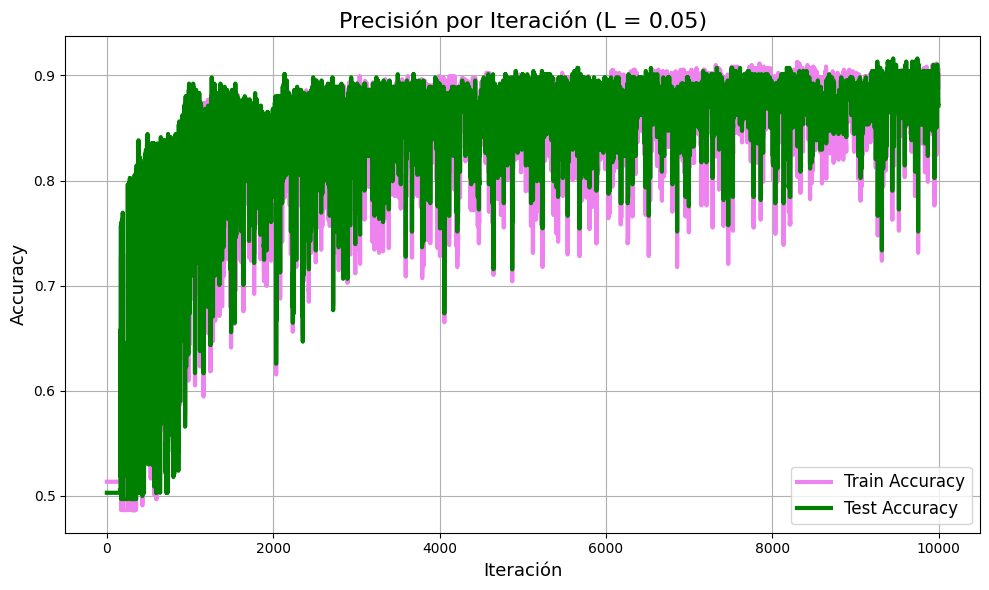

  0%|          | 0/10000 [00:00<?, ?it/s]

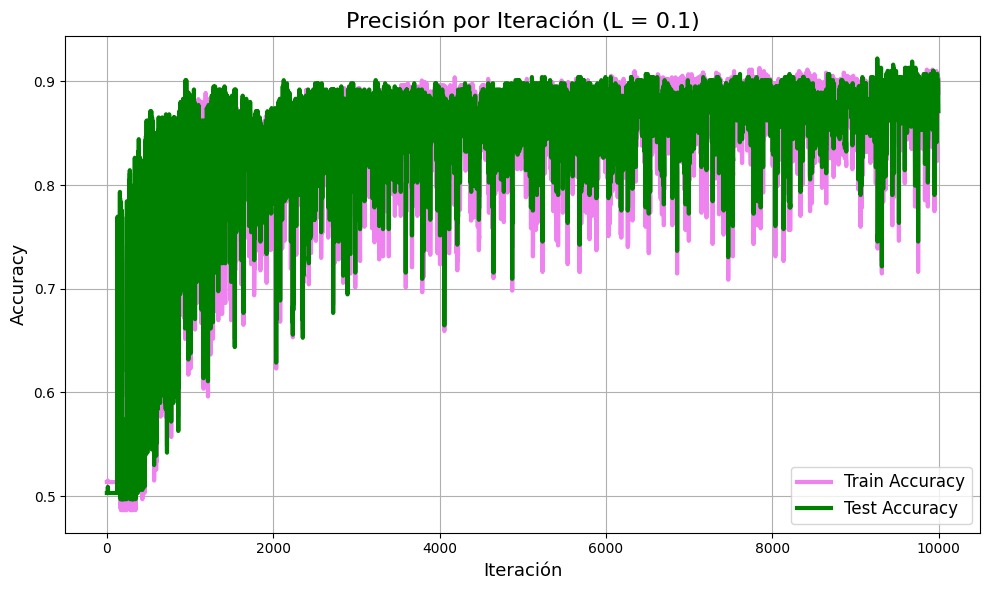

  0%|          | 0/50000 [00:00<?, ?it/s]

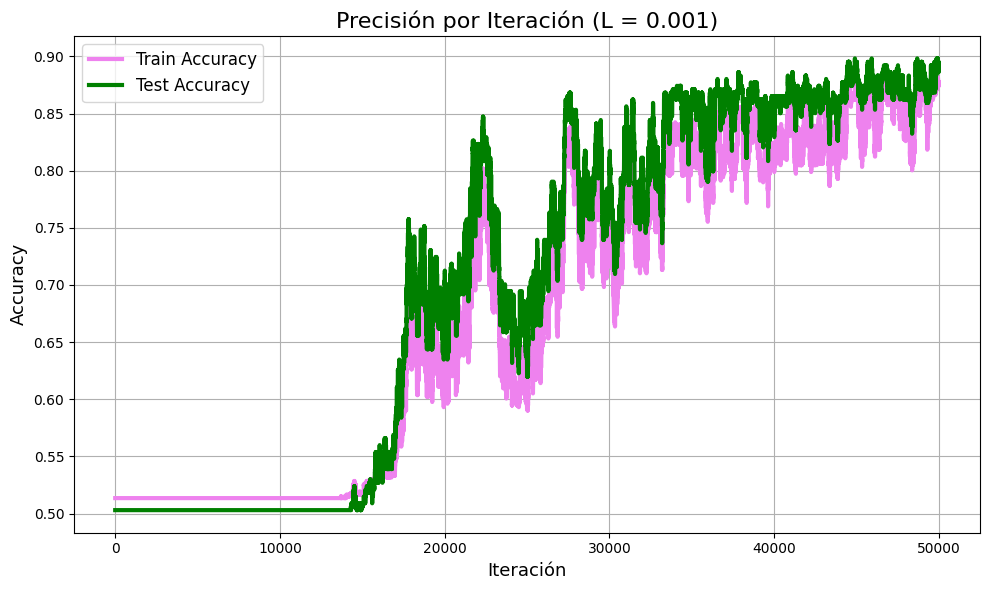

  0%|          | 0/50000 [00:00<?, ?it/s]

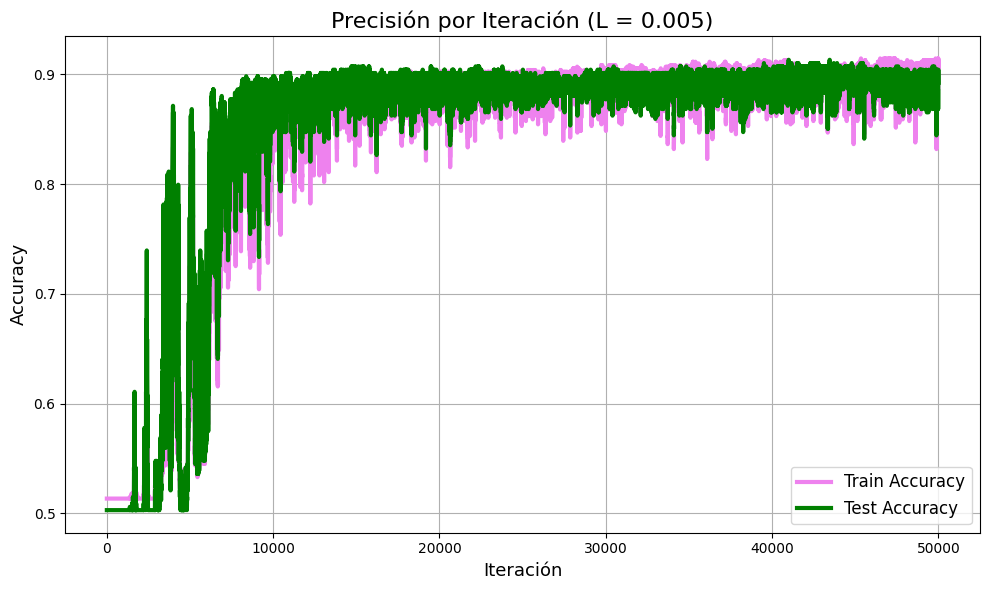

  0%|          | 0/50000 [00:00<?, ?it/s]

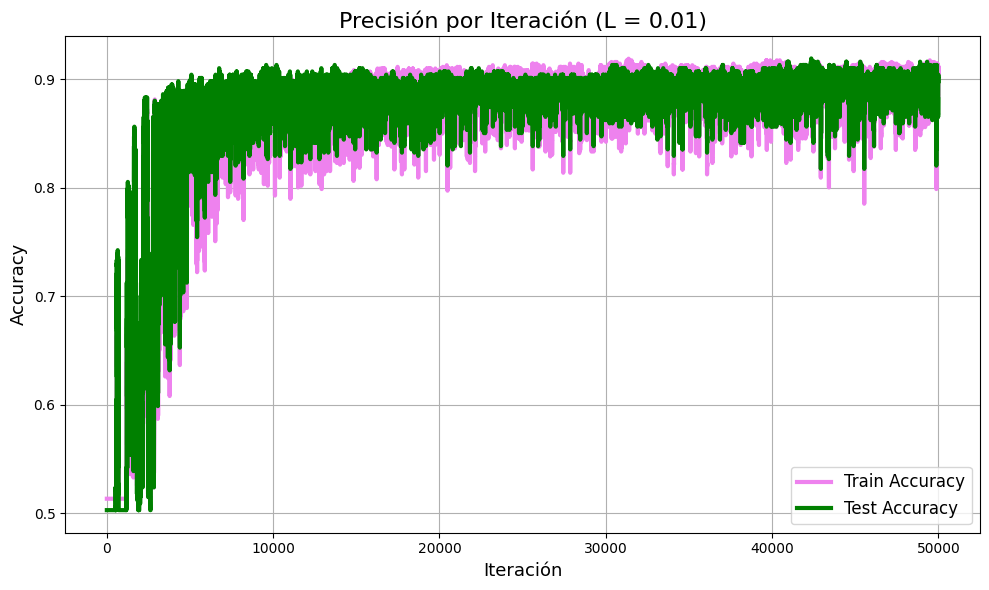

  0%|          | 0/50000 [00:00<?, ?it/s]

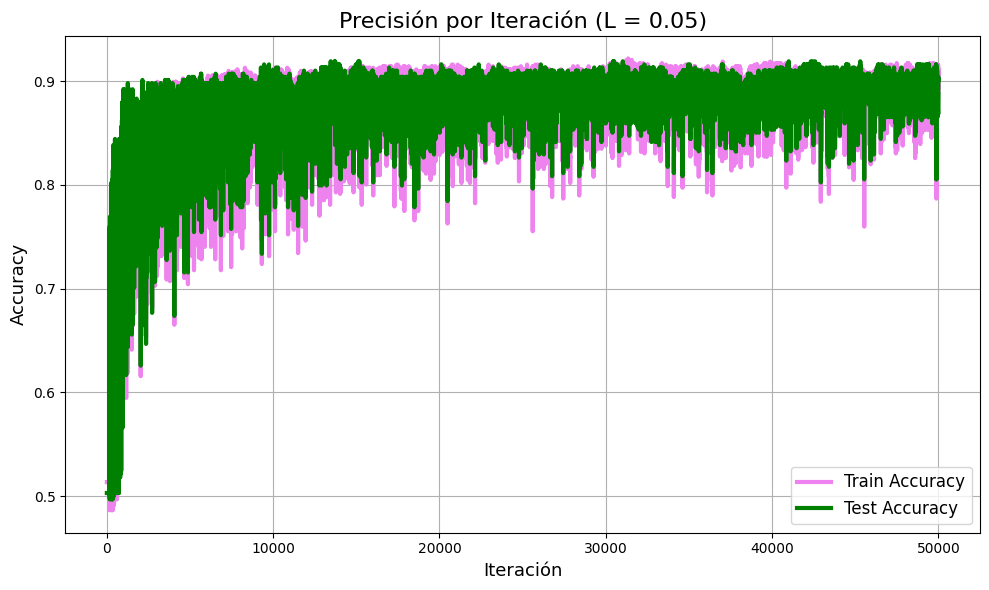

  0%|          | 0/50000 [00:00<?, ?it/s]

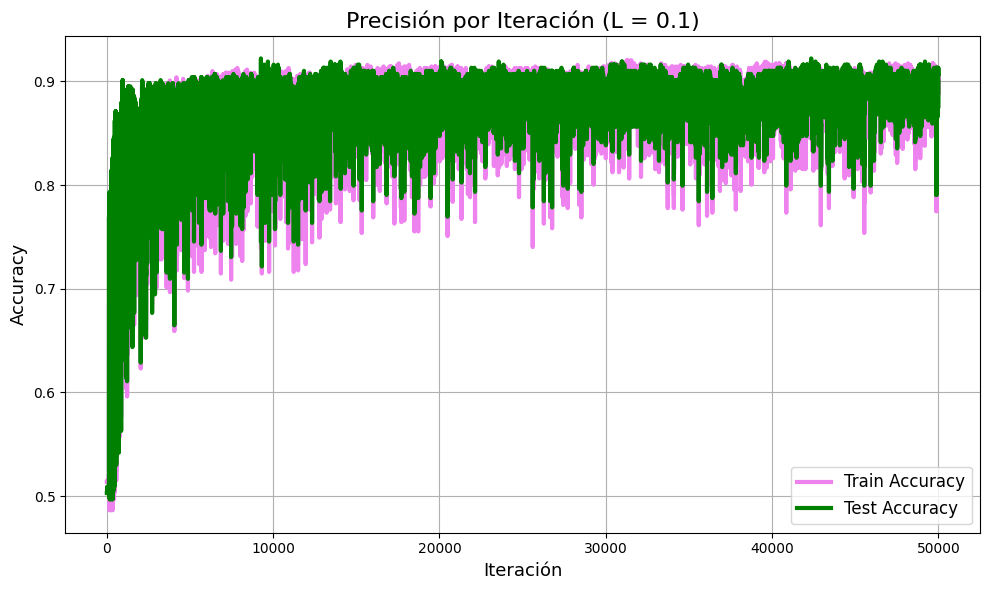

  0%|          | 0/1000000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [45]:
# Se ejecuta la función mi_red_neuronal con distintas configuraciones para evaluar su rendimiento

iteracion = [1000, 10_000, 50_000, 100_0000]   # Diferentes números de iteraciones para el entrenamiento
L_l = [0.001, 0.005, 0.01, 0.05, 0.1]        # Diferentes valores de tasa de aprendizaje (learning rate)

for iter in iteracion:                    # Iterar sobre cada cantidad de iteraciones
    for L in L_l:                         # Iterar sobre cada tasa de aprendizaje
        mi_red_neuronal(L=L, iteraciones=iter)  # Entrenar la red neuronal con la configuración actual
        print()                          # Salto de línea para separar resultados en consola

#### Por lo visto en los gráficos, decidimos utilizar:
      L: 0.005
      Iteraciones: 50.000

##*Forward Propagation*

In [46]:
#Inicialización de pesos y sesgos aleatorios:
hidden_size = 6

# Pesos y sesgos iniciados aleatoriamente para el primer forward propagation
np.random.seed(10) # Fijar semilla para reproducibilidad
w_hidden = np.random.rand(6, allInputs.shape[1])  ## Pesos para la capa oculta

# Pesos para la capa de salida: 1 neurona (output), recibe 6 entradas (de la capa oculta)
w_output = np.random.rand(1, hidden_size)

# Sesgos para capa oculta (6 neuronas, 1 valor cada una)
b_hidden = np.random.rand(hidden_size , 1)

# Sesgo para la neurona de salida (1 valor)
b_output = np.random.rand(1, 1)

#Definición de funciones de activación:

# ReLU: devuelve x si x>0, sino 0 (activa sólo señales positivas)
relu = lambda x: np.maximum(x, 0)

# Función logística (sigmoide): transforma valores en rango (0, 1)
logistic = lambda x: 1 / (1 + np.exp(-x))

#Función de forward propagation

#(Funcion que corre la red neuronal con los datos de entrada para predecir la salida)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden   # Cálculo lineal capa oculta
    A1 = relu(Z1)                   # Aplicar ReLU
    Z2 = w_output @ A1 + b_output   # Cálculo lineal capa salida
    A2 = logistic(Z2)               # Aplicar sigmoide para probabilidad
    return Z1, A1, Z2, A2

##*Precisión con los datos del test*

In [47]:
# Hacer predicciones para datos de test (trasponer para que dimensiones coincidan)
test_predictions_tuple = forward_prop(xTest.transpose())

# Extraer activación de la capa de salida,A2 (predicciones)
test_predictions = test_predictions_tuple[3]

#Si test_predictions es un DataFrame, convertirlo a NumPy array
if isinstance(test_predictions, pd.DataFrame):
    test_predictions = test_predictions.values

# Convertir predicciones probabilísticas a etiquetas binarias (0 o 1) usando umbral 0.5
# y Comparar etiquetas predichas con etiquetas reales del test
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int),np.array(yTest))

# Calcular porcentaje de aciertos (accuracy)
accuracy = np.sum(test_comparisons.astype(int)) / xTest.shape[0]

# Mostrar resultado
print("Accuracy del Test: ", accuracy)


Accuracy del Test:  0.5029940119760479


##*Backward Propagation*

In [48]:
# Backpropagation (propagación hacia atrás)
# Calcula los gradientes (derivadas) para actualizar los pesos y sesgos

# Tasa de aprendizaje
L = 0.005

# Derivadas de las funciones de activación

#Derivada de ReLU: 1 si x>0, sino 0 (operación booleana que devuelve un array de 1s y 0s)
d_relu = lambda x: (x > 0).astype(float)

# Derivada de la función logística (sigmoide)
# d/dx sigmoid(x) = sigmoid(x) * (1 - sigmoid(x))
# Pero aca está expresado de forma equivalente
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2


# Cálculo de derivadas para obtener la derivada del costo con respecto a cada elemento
def backward_prop(Z1, A1, Z2, A2, X, Y):

    #Calcula los gradientes de la función de costo con respecto a pesos y sesgos
    #usando la regla de la cadena.
    #Parámetros:
    #- Z1: valores lineales antes de ReLU (capa oculta)
    #- A1: activaciones después de ReLU (capa oculta)
    #- Z2: valor lineal antes de sigmoide (capa salida)
    #- A2: activación después de sigmoide (predicción)
    #- X: datos de entrada (features x cantidad de ejemplos)
    #- Y: etiquetas reales (salida esperada)

    #Retorna:
    #- dC_dW1, dC_dB1: gradientes para pesos y sesgos de la capa oculta
    #- dC_dW2, dC_dB2: gradientes para pesos y sesgos de la capa salida


    # Cálculo de cada parte de la derivada utilizando la regla de la cadena
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    # --- Cálculo de gradientes ---
    # Derivadas del costo con respecto a W2, B2, A1, W1 y B1


    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T # Gradiente de costo respecto a pesos de salida (W2)

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2 # Gradiente respecto a sesgo de salida (B2)

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1  # Gradiente respecto a activaciones de capa oculta (A1)

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T # Gradiente respecto a pesos de capa oculta (W1)

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1   # Gradiente respecto a sesgo capa oculta (B1)

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

##*Descenso de gradiente estocástico*

In [49]:
# Descenso de gradiente estocástico para entrenar la red neuronal

# Número total de iteraciones del entrenamiento
iteraciones = 50_000

for i in range(iteraciones):
    # Seleccionar aleatoriamente un índice de fila del conjunto de entrenamiento
    idx = np.random.choice(n, 1, replace=False)[0]

    # Extraer la muestra de entrada (X_sample) correspondiente a ese índice
    # y convertirla en vector columna (dimensiones: características x 1)
    X_sample = xEntrenamiento[idx].reshape(-1, 1)

    # Extraer la etiqueta correspondiente (Y_sample) y darle forma (1 x 1)
    Y_sample = yEntrenamiento[idx].reshape(-1, 1)

    # Hacer la propagación hacia adelante con esta muestra para obtener activaciones
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # Calcular gradientes de pesos y sesgos mediante retropropagación (backprop)
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # Actualizar los pesos y sesgos restando la tasa de aprendizaje por los gradientes
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

##*Evaluación de la precisión del modelo en conjuntos de entrenamiento y prueba*



In [50]:
# Calculo de precisión de entrenamiento

# Obtener predicciones para el conjunto de entrenamiento (última activación A2)
train_predictions = forward_prop(xEntrenamiento.transpose())[3]

# Convertir el DataFrame train_predictions a un array NumPy antes de usar flatten y compara con etiquetas reales
train_predictions_array = train_predictions
train_comparisons = np.equal((train_predictions_array >= .5).flatten().astype(int), yEntrenamiento)

# Calcular exactitud (accuracy) del entrenamiento
train_accuracy = sum(train_comparisons.astype(int)) / xEntrenamiento.shape[0]
print(f"Puntaje del conjunto de entrenamiento: {train_accuracy}")


# Obtener predicciones para el conjunto de prueba
test_predictions = forward_prop(xTest.transpose())[3]
test_predictions_array = test_predictions.values
test_comparisons = np.equal((test_predictions_array >= .5).flatten().astype(int), yTest)

# Calcular exactitud (accuracy) de prueba
test_accuracy = sum(test_comparisons.astype(int)) / xTest.shape[0]
print(f"Puntaje del conjunto de prueba: {test_accuracy}")

Puntaje del conjunto de entrenamiento: 0.8933933933933934
Puntaje del conjunto de prueba: 0.8922155688622755


##*Pedir datos al usuario, normalizarlos y predecir aprobación usando la red*


In [51]:
def pedir_Datos():  # Solicita al usuario que ingrese sus datos uno por uno
  age = int(input("Age: "))
  gender = int(input("Gender: "))
  study_hours_per_day = int(input("Study Hours: "))
  social_media_hours = int(input("Social Media Hours: "))
  netflix_hours = int(input("Netflix Hours: "))
  part_time_job = int(input("Part Time Job: "))
  attendance_percentage = int(input("Attendance: "))
  sleep_hours = int(input("Sleep Hours: "))
  exercise_frequency = int(input("Exercise Freq: "))
  metal_health_rating = int(input("Metal Health Rating: "))
  return [age, gender, study_hours_per_day, social_media_hours, netflix_hours, part_time_job, attendance_percentage, sleep_hours, exercise_frequency, metal_health_rating]

# Funciones para predecir usando la red neuronal

def predecirProbabilidad(nuevos_valores):
    # Aplica forward propagation para obtener la probabilidad de aprobación
    X= (nuevos_valores.values).T
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predecirAprobacion(nuevos_valores):
    # Usa la probabilidad para decidir si aprueba o no, con umbral 0.5
    output_values = predecirProbabilidad(nuevos_valores)
    if output_values > .5:
        return "Aprobo"
    else:
        return "No Aprobo"


# Pedir datos al usuario y crear un DataFrame
datos_usuario = pd.DataFrame([pedir_Datos()])

#Normalizar
max_values_train = xEntrenamiento.max()
datos_usuario_normalized = datos_usuario / max_values_train

#predecir
print(predecirAprobacion(datos_usuario_normalized))# Mostrar predicción para los datos ingresados

Age: 20
Gender: 1
Study Hours: 1
Social Media Hours: 8
Netflix Hours: 9
Part Time Job: 1
Attendance: 2
Sleep Hours: 1
Exercise Freq: 7
Metal Health Rating: 2
No Aprobo
